<a href="https://colab.research.google.com/github/yqz5514/Reg-Stats-Coding-Project/blob/main/Total_Pages_in_the_Code_of_Federal_Regulations_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("R.utils")
library("R.utils")
# runtime: within 1 min

install.packages('png') # use for load png file
install.packages('showtext') #directly works on .OTF fonts, for custom font on ggplot
install.packages('ggpattern') # for plot pattern
install.packages('ggrepel') # legend
install.packages('gcookbook')
# load packages
library(ggplot2)
library(showtext)
library(png)
library(ggpattern)
library(tidyr)
library(ggrepel)
library(dplyr)
library(scales)
library(gcookbook)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: sysfonts

Loading required package: showtextdb


Attaching package: ‘tidyr’


The following object is masked from ‘package:R.utils’:

    extract



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
# theme funciton
mytheme <- theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, vjust=-2, margin = margin(b = 40, unit = "pt"), size=20),
    axis.text.x = element_text(angle = 65, hjust = 1, vjust = 1,size=12),
    legend.position = "none",
    panel.grid.major.x = element_blank(),
    axis.text.y = element_text(size=12),
    axis.title.y = element_text(size = 12, angle = 90, vjust = 1),
    panel.grid.major.y = element_line(color = "#E0E0E0", linetype = "solid"),
    panel.grid.minor = element_blank(),
    text =element_text(family = "avenir_lt_pro"),
    plot.caption = element_text(hjust = 1, margin = margin(t = 0, l = 6, unit = "pt"),size=11),
    #plot.margin = unit(c(1, 1, 3, 1), "lines"),
    plot.margin = margin(50, 50, 50, 50),
    axis.ticks.x = element_line()
  )


In [5]:

# Dowloading logo and font style for reg stats plots
download.file("https://raw.githubusercontent.com/yqz5514/Reg-Stats-Coding-Project/main/gw_ci_rsc_2cs_pos.png",
              "gw_ci_rsc_2cs_pos.png.gz")
download.file("https://github.com/yqz5514/Reg-Stats-Coding-Project/raw/main/a-avenir-next-lt-pro.otf",
              "a-avenir-next-lt-pro.otf.gz")
gunzip('gw_ci_rsc_2cs_pos.png.gz')
gunzip('a-avenir-next-lt-pro.otf.gz')

In [6]:
# download ES rules published data
download.file("https://raw.githubusercontent.com/yqz5514/Reg-Stats-Coding-Project/main/data/TotalPagesCodeFedReg_11012022.csv",
              "TotalPagesCodeFedReg_11012022.csv.gz")
gunzip('TotalPagesCodeFedReg_11012022.csv.gz')

In [7]:
df <- read.csv("/content/TotalPagesCodeFedReg_11012022.csv")

df1 <- df[c(16:87),c(0:3)]
colnames(df1) <- c("year", "color", "tolpages")

current_date <- format(Sys.Date(), "%B %d, %Y")
caption_text <- paste("Sources: Office of the Federal Register (federalregister.gov) for the years starting 2021;\n       Office of Information and Regulatory Affairs (OIRA) (reginfo.gov) for all prior years.\n\nUpdated:", current_date)

df2 = subset(df1, select = -c(color) )

df2$tolpages <- as.numeric(gsub(",","",df2$tolpages))

In [8]:
#@title load custome font to system
font_add("avenir_lt_pro","a-avenir-next-lt-pro.otf")
showtext_auto()

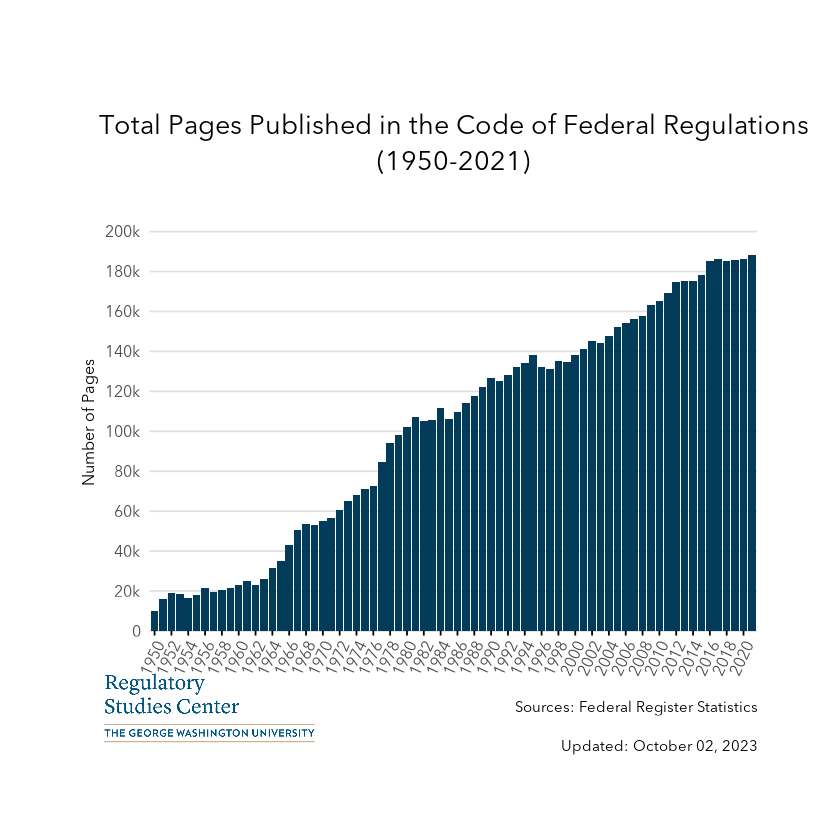

In [9]:
#logo
get_png <- function(filename) {
  grid::rasterGrob(png::readPNG(filename),interpolate = TRUE) # set up the size of logo
}

l <- get_png("gw_ci_rsc_2cs_pos.png")
# create caption text
caption_text <- paste("Sources:  Federal Register Statistics \n\nUpdated:", current_date)

# format wrapping setting for caption text
wrapped_caption <- paste(strwrap(caption_text, width = 95), collapse = "\n")


bar2 <-
  ggplot(data=df2, aes(x=year, y=tolpages)) +
  geom_bar(stat="identity", fill="#033C5A")+
  #geom_text(aes(label=len), vjust=-0.3, size=3.5)+

  ggtitle("Total Pages Published in the Code of Federal Regulations \n(1950-2021)") +
  ylab("Number of Pages") +
  xlab("") +
  scale_y_continuous(breaks = seq(0, max(df2$tolpages)+20000, by = 20000), expand = c(0, 0),
                     limits = c(-2, max(df2$tolpages)+20000),
                     labels = function(x) ifelse(x == 0, "0", scales::label_number(suffix = "k", scale = 1e-3)(x)),) +

  scale_x_discrete(breaks = seq(min(df2$year), max(df2$year), by = 2)) + # only display even year
  annotation_custom(l, xmin = -5, xmax = 20, ymin = 30000, ymax = -107000) + # for logo
  coord_cartesian(clip = "off") +
  mytheme+
  labs(caption = wrapped_caption)


bar2
#ggsave("totalpages.pdf", plot = bar2, width = 12, height = 9, dpi = 300)